In [2]:
import sklearn
print(sklearn.__version__)

# Importar las bibliotecas necesarias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import pandas as pd

1.5.0


In [3]:
# Cargar el conjunto de datos de ejemplo (iris)
data = pd.read_csv('/Users/carolinasv/Documents/VS_Code/pulsera_inteligente/Datasets/Procesados/Dataset2_procesado.csv')
X = data[["itching","shivering","chills","stomach_pain","vomiting", "fatigue", "cold_hands_and_feets", 
        "cough", "high_fever", "breathlessness", "headache", "nausea", "abdominal_pain", 
        "mild_fever", "malaise","throat_irritation","redness_of_eyes","congestion","fast_heart_rate",
        "dizziness","movement_stiffness","irritability","watering_from_eyes","lack_of_concentration",
        "palpitations"]]
y = data[['prognosis']]

In [4]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [5]:
# Crear el modelo de árbol de decisiones
arbol = DecisionTreeClassifier()

In [6]:
# Entrenar el modelo con los datos de entrenamiento
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
# Realizar predicciones en los datos de prueba
y_pred = arbol.predict(X_test)

In [8]:
from sklearn.model_selection import cross_val_score

# Realizar una validación cruzada de 5 pliegues
precisiones = cross_val_score(arbol, X, y, cv=5, scoring='accuracy')

print(f'Las precisiones obtenidas en cada pliegue son: {precisiones}')
print(f'La precisión media es: {precisiones.mean()}')

Las precisiones obtenidas en cada pliegue son: [0.97708333 0.98125    0.98958333 1.         1.        ]
La precisión media es: 0.9895833333333333


In [9]:
depths = range(1, 80)  # Vamos a probar profundidades de 1 a 20
accuracies = []

# Entrenar y evaluar el modelo para cada profundidad
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=22)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Depth: {depth}, Accuracy: {accuracy}')

Depth: 1, Accuracy: 0.08125
Depth: 2, Accuracy: 0.13125
Depth: 3, Accuracy: 0.17291666666666666


Depth: 4, Accuracy: 0.26666666666666666
Depth: 5, Accuracy: 0.40208333333333335
Depth: 6, Accuracy: 0.4979166666666667
Depth: 7, Accuracy: 0.5270833333333333
Depth: 8, Accuracy: 0.575
Depth: 9, Accuracy: 0.6875
Depth: 10, Accuracy: 0.85
Depth: 11, Accuracy: 0.95
Depth: 12, Accuracy: 0.9875
Depth: 13, Accuracy: 0.9875
Depth: 14, Accuracy: 0.9895833333333334
Depth: 15, Accuracy: 0.9916666666666667
Depth: 16, Accuracy: 0.9916666666666667
Depth: 17, Accuracy: 0.9916666666666667
Depth: 18, Accuracy: 0.9916666666666667
Depth: 19, Accuracy: 0.9916666666666667
Depth: 20, Accuracy: 0.9916666666666667
Depth: 21, Accuracy: 0.9916666666666667
Depth: 22, Accuracy: 0.9916666666666667
Depth: 23, Accuracy: 0.9916666666666667
Depth: 24, Accuracy: 0.9916666666666667
Depth: 25, Accuracy: 0.9916666666666667
Depth: 26, Accuracy: 0.9916666666666667
Depth: 27, Accuracy: 0.9916666666666667
Depth: 28, Accuracy: 0.9916666666666667
Depth: 29, Accuracy: 0.9916666666666667
Depth: 30, Accuracy: 0.9916666666666667
D

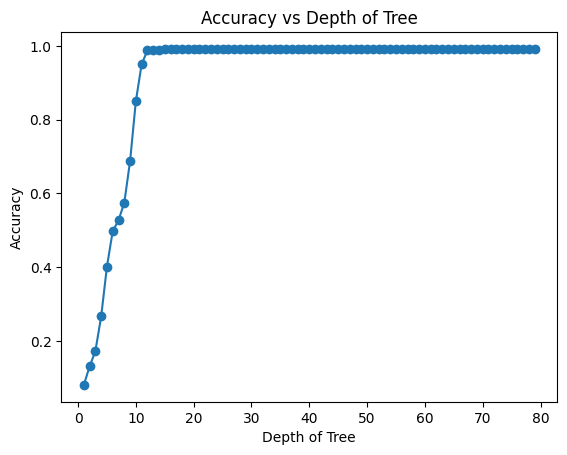

In [17]:
# Crear un gráfico de la precisión en función de la profundidad
import matplotlib.pyplot as plt
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth of Tree')
plt.show()


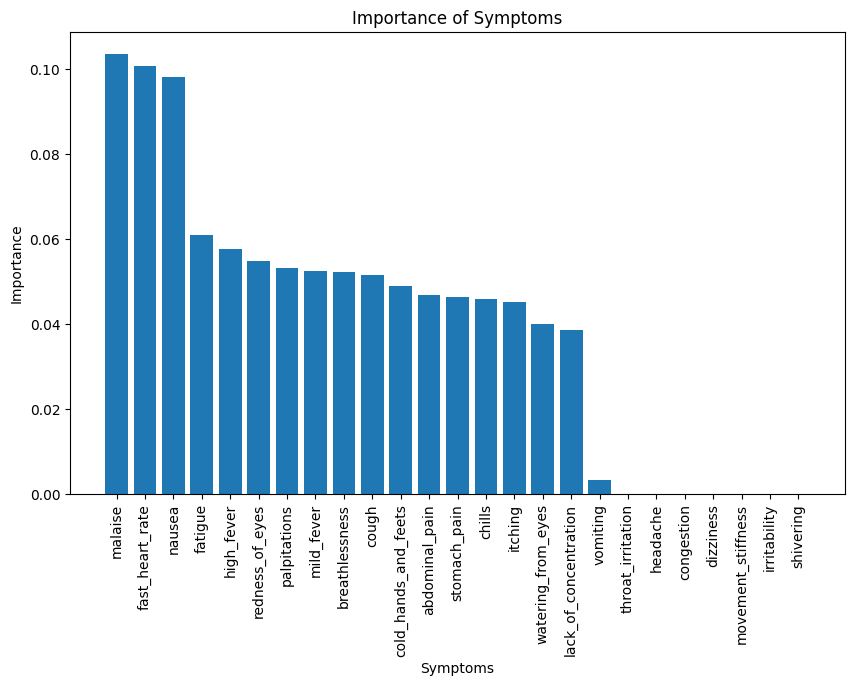

In [18]:
# Crear un gráfico de la importancia de las características
import matplotlib.pyplot as plt
import numpy as np
importance = arbol.feature_importances_
symptoms = X.columns

# Sort the importance values and symptoms in descending order
sorted_indices = np.argsort(importance)[::-1]
sorted_importance = importance[sorted_indices]
sorted_symptoms = symptoms[sorted_indices]

# Create a bar plot of the importance of symptoms
plt.figure(figsize=(10, 6))
plt.bar(sorted_symptoms, sorted_importance)
plt.xticks(rotation=90)
plt.xlabel('Symptoms')
plt.ylabel('Importance')
plt.title('Importance of Symptoms')
plt.show()

In [10]:
# Ajustar la precisión del modelo a 15 capas de profudidad
clf = DecisionTreeClassifier(max_depth=15, random_state=22)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9916666666666667


In [11]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.9916666666666667


[Text(0.8831615120274914, 0.96875, 'x[16] <= 0.5\ngini = 0.952\nsamples = 1920\nvalue = [79.0, 62.0, 97.0, 86.0, 98.0, 83.0, 102.0, 101.0, 98.0\n74.0, 79.0, 96.0, 94.0, 93.0, 91.0, 98.0, 99.0, 97.0\n100.0, 99.0, 94.0]'),
 Text(0.8556701030927835, 0.90625, 'x[24] <= 0.5\ngini = 0.949\nsamples = 1821\nvalue = [79.0, 62.0, 97.0, 86.0, 98.0, 83.0, 102.0, 101.0, 98.0\n74.0, 79.0, 96.0, 94.0, 93.0, 91.0, 98.0, 0.0, 97.0\n100.0, 99.0, 94.0]'),
 Text(0.8694158075601375, 0.9375, 'True  '),
 Text(0.8281786941580757, 0.84375, 'x[13] <= 0.5\ngini = 0.947\nsamples = 1725\nvalue = [79, 62, 97, 86, 98, 83, 102, 101, 98, 74, 79, 0\n94, 93, 91, 98, 0, 97, 100, 99, 94]'),
 Text(0.738831615120275, 0.78125, 'x[14] <= 0.5\ngini = 0.937\nsamples = 1437\nvalue = [79.0, 62.0, 97.0, 86.0, 98.0, 83.0, 102.0, 101.0, 98.0\n74.0, 79.0, 0.0, 94.0, 93.0, 91.0, 98.0, 0.0, 97.0\n0.0, 5.0, 0.0]'),
 Text(0.6426116838487973, 0.71875, 'x[6] <= 0.5\ngini = 0.923\nsamples = 1145\nvalue = [79, 62, 97, 86, 5, 83, 0, 101, 98, 

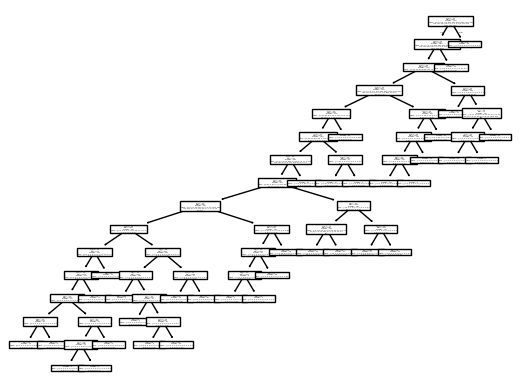

In [12]:
# Visualizar el árbol de decisiones
plot_tree(arbol)

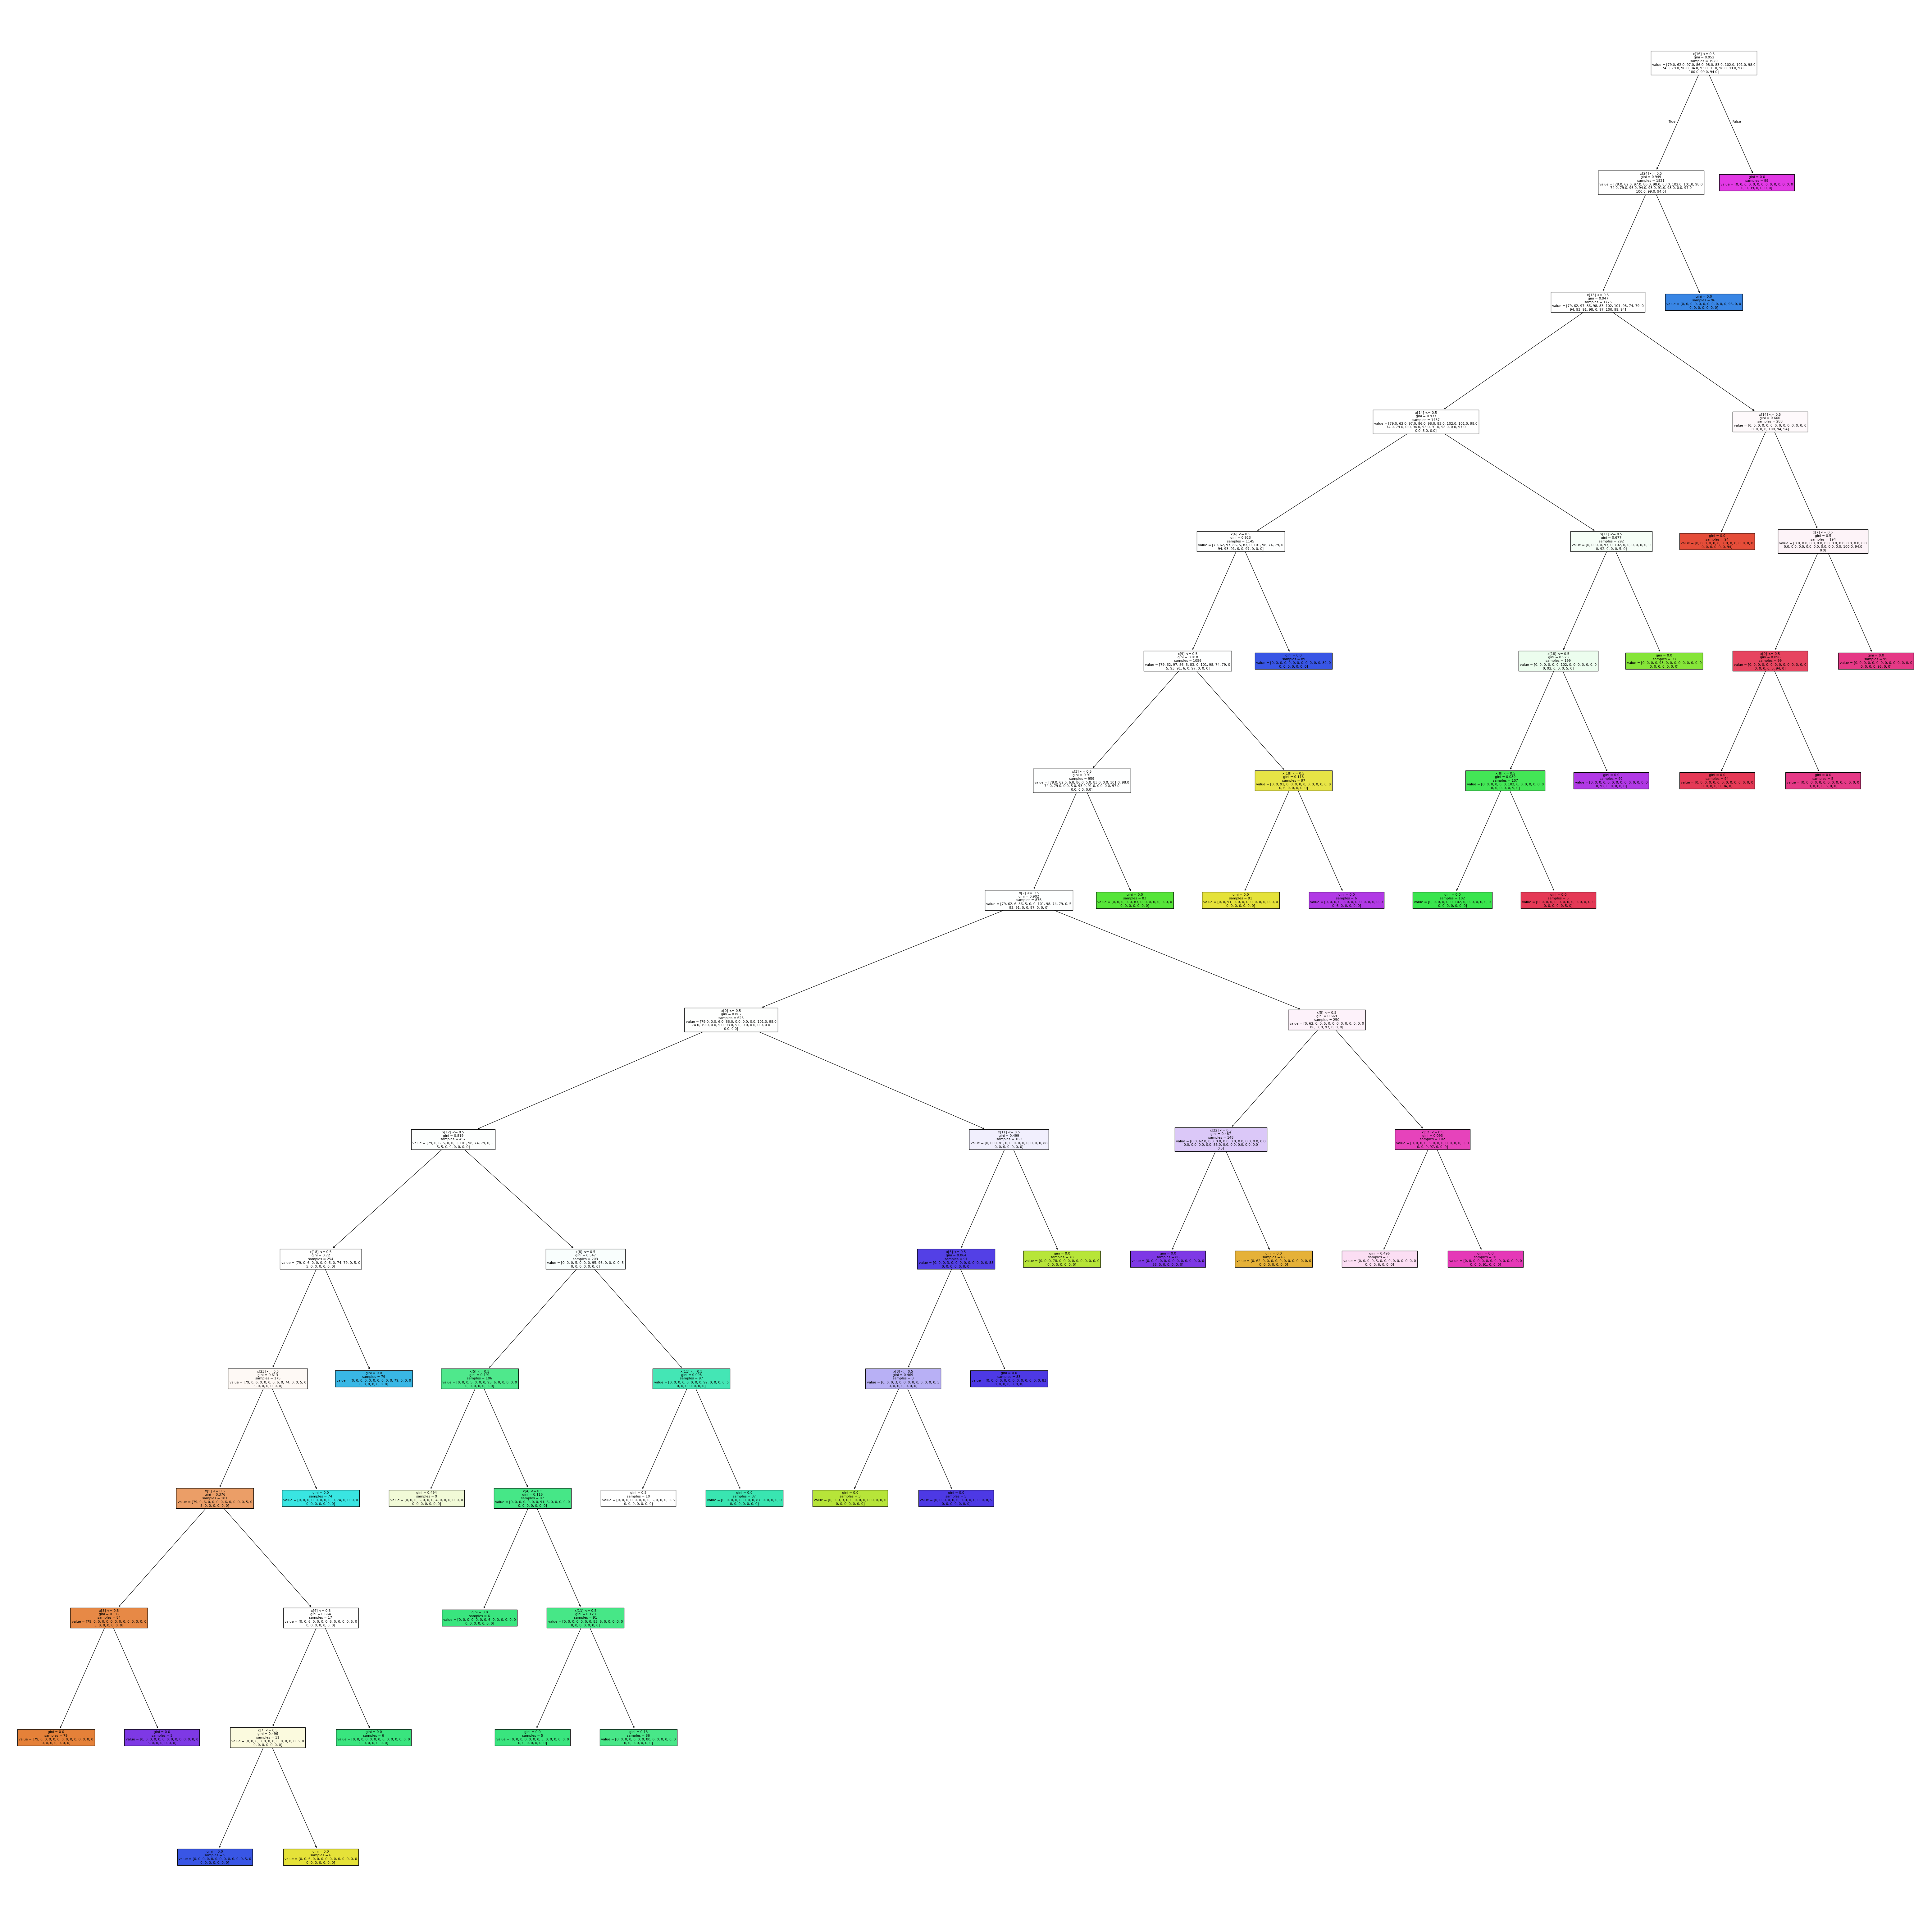

In [16]:
# Importar las bibliotecas necesarias
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(80, 80))  # Ajusta el tamaño de la figura aquí

# Visualizar el árbol de decisiones
plot_tree(arbol, filled=True, ax=ax)  # El parámetro 'filled' añade colores

# Mostrar la figura
plt.show()

In [14]:
# Guardar el modelo en un archivo
import joblib
joblib.dump(arbol, 'prediccion_enfermedad1.joblib')

['prediccion_enfermedad1.joblib']